## Acessando o Jupyter da máquina virtual

Neste projeto, foi utilizada a máquina virtual configurada na Azure (https://github.com/mtsfreitas/configuring-environment-on-azure). Com a máquina virtual em execução, foi criado o arquivo SpaceshipTitanic.ipynb e realizada a importação dos arquivos .csv de treinamento e teste, disponíveis em: https://www.kaggle.com/competitions/spaceship-titanic/data

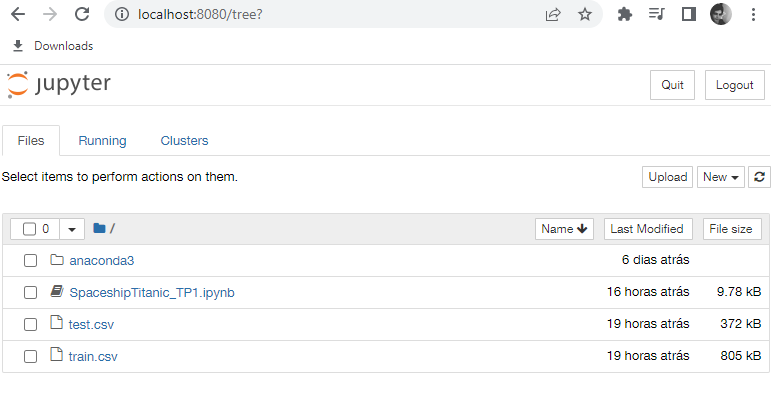

# Modelo utilizando Random Forest

## Importando bibliotecas

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

## Carregando os dados

In [2]:
dados_de_treino = pd.read_csv("train.csv")
dados_de_teste = pd.read_csv("test.csv")

## Entendendo os dados

Visualizando as cinco primeiras linhas do Dataframe.

In [3]:
dados_de_treino.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Resumo geral da estrutura e conteúdo do Dataframe. Exibindo informações básicas como: índice, os nomes das colunas, o número de valores não nulos e o tipo de dados de cada coluna. 

In [4]:
dados_de_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Contando a quantidade de valores ausentes em cada coluna do DataFrame.

In [5]:
dados_de_treino.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Analisando a distribuição dos valores no conjunto de dados para identificar valores comuns ou incomuns. Retorna uma série contendo a frequência de ocorrência de cada valor único no DataFrame.

In [6]:
dados_de_treino.value_counts()

PassengerId  HomePlanet  CryoSleep  Cabin     Destination    Age   VIP    RoomService  FoodCourt  ShoppingMall  Spa    VRDeck  Name               Transported
0001_01      Europa      False      B/0/P     TRAPPIST-1e    39.0  False  0.0          0.0        0.0           0.0    0.0     Maham Ofracculy    False          1
6162_01      Earth       False      F/1181/S  55 Cancri e    22.0  False  0.0          0.0        1.0           575.0  0.0     Bonyan Hineyley    False          1
6175_01      Earth       False      G/1000/P  TRAPPIST-1e    18.0  False  628.0        0.0        0.0           31.0   150.0   Thel Pittler       False          1
6174_02      Earth       True       G/999/P   PSO J318.5-22  4.0   False  0.0          0.0        0.0           0.0    0.0     Cherry Fisheparks  True           1
6174_01      Earth       False      F/1274/P  55 Cancri e    24.0  False  0.0          479.0      116.0         1.0    37.0    Jord Mcbriddley    False          1
                           

Resumo estatístico das colunas numéricas do DataFrame para compreender a distribuição e a tendência central dos dados numéricos. Contendo estatísticas como a contagem, média, desvio padrão, mínimo, quartis e máximo para cada coluna numérica.

In [7]:
dados_de_treino.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
dados_de_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [9]:
dados_de_teste.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [10]:
dados_de_teste.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

## Selecionando colunas numéricas

Primeiramente, é preciso estabelecer uma lista contendo os nomes das colunas numéricas que serão empregadas como features no modelo. As respectivas colunas são:


* **CryoSleep**: indica se o passageiro escolheu ser colocado em animação suspensa durante a viagem.
* **Age**: idade do passageiro.
* **VIP**: indica se o passageiro pagou pelo serviço VIP durante a viagem.
* **RoomService**: valor cobrado pelo serviço de quarto.
* **FoodCourt**: valor cobrado pelo uso do refeitório.
* **ShoppingMall**: valor cobrado pelo uso do shopping a bordo.
* **Spa**: valor cobrado pelo uso do spa.
* **VRDeck**: valor cobrado pelo uso do deck de realidade virtual.


In [11]:
colunas_de_features = ['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# Criando a variável 'X', que conterá as features dos dados de treino.
X = dados_de_treino[colunas_de_features]
# Criando a variável 'y', que conterá o target dos dados de treino. 
# OBS: O alvo é a coluna "Transported", que indica se o passageiro foi transportado para outra dimensão.
y = dados_de_treino["Transported"]

## Dividindo os dados em treino e validação

* **train_test_split**: É uma função da biblioteca scikit-learn que divide os dados em conjuntos de treino e validação. A função recebe como argumentos os dados das características (X) e o alvo (y), além de outros parâmetros opcionais.

* **test_size**: É um parâmetro opcional da função train_test_split que indica a proporção dos dados que serão reservados para o conjunto de validação. Neste caso, test_size=0.2 significa que 20% dos dados serão usados para validação e os 80% restantes para treino.

* **random_state**: É um parâmetro opcional da função train_test_split que controla a aleatoriedade da divisão dos dados. Ao definir um valor fixo, como random_state=42, garantimos que a divisão seja sempre a mesma, o que facilita a reprodução dos resultados e a comparação entre diferentes experimentos. Se não for especificado, a divisão pode ser diferente a cada execução do código.

* **X_treino, X_validacao, y_treino, y_validacao**: São as variáveis que receberão os dados divididos. A função train_test_split retorna quatro valores, que são as características e o alvo dos conjuntos de treino e validação, respectivamente.

As seguintes variáveis representam:

* X_treino: características do conjunto de treino
* X_validacao: características do conjunto de validação
* y_treino: alvo do conjunto de treino
* y_validacao: alvo do conjunto de validação

In [12]:
# Dividindo os dados em treino e validação
X_treino, X_validacao, y_treino, y_validacao = train_test_split(X, y, test_size=0.2, random_state=42)

## Tratando valores ausentes

* **SimpleImputer**: É uma classe da biblioteca scikit-learn que fornece uma estratégia básica para o preenchimento de valores ausentes. A classe aceita um parâmetro chamado strategy, que define a estratégia de preenchimento dos valores ausentes.

* **strategy='mean'**: Neste caso, está sendo utilizado a estratégia 'mean', que preenche os valores ausentes com a média dos valores presentes na coluna.

* **X_treino_preenchido** = preenchedor.fit_transform(X_treino): A função fit_transform ajusta o imputer aos dados de treino (calculando a média de cada coluna) e, em seguida, aplica a transformação nos dados, preenchendo os valores ausentes com as médias calculadas. O resultado dessa transformação, um conjunto de dados de treino com os valores ausentes preenchidos, é atribuído à variável X_treino_preenchido.

* **X_validacao_preenchido** = preenchedor.transform(X_validacao): A função transform aplica a transformação do imputer, que foi ajustado aos dados de treino, aos dados de validação. Isso significa que os valores ausentes no conjunto de validação são preenchidos com as médias calculadas a partir do conjunto de treino. O resultado dessa transformação, um conjunto de dados de validação com os valores ausentes preenchidos, é atribuído à variável X_validacao_preenchido.

In [13]:
# Tratando valores ausentes (NaN) nos conjuntos de treino e validação
preenchedor = SimpleImputer(strategy='mean')
X_treino_preenchido = preenchedor.fit_transform(X_treino)
X_validacao_preenchido = preenchedor.transform(X_validacao)

## Definindo X_test

A variável X_test, conterá as features dos dados de teste. Selecionando apenas as colunas numéricas (definidas na lista colunas_de_features) do DataFrame dados_de_teste. Isso é necessário para fazer as previsões finais do modelo.

In [14]:
# Definindo X_test (features) dos dados de teste
X_test = dados_de_teste[colunas_de_features]

Aplicando o preenchedor (imputer) aos dados de teste para tratar os valores ausentes (NaN) que possam estar presentes. Assim como fizemos para os dados de treino e validação, precisamos garantir que os dados de teste também não contenham valores ausentes antes de usá-lo.

In [15]:
# Aplicando preenchedor (imputer) aos dados de teste
X_test_preenchido = preenchedor.transform(X_test)

## Treinando o modelo de Random Forest

* **RandomForestClassifier**: É uma classe da biblioteca scikit-learn que implementa um algoritmo de aprendizado de máquina baseado em árvores de decisão chamado Random Forest. 

* **random_state=42**: É um parâmetro opcional da classe RandomForestClassifier que controla a aleatoriedade do processo de construção das árvores de decisão no modelo. Ao definir um valor fixo, como random_state=42, garantimos que o modelo seja sempre o mesmo, o que facilita a reprodução dos resultados e a comparação entre diferentes experimentos. Se não for especificado, o modelo pode ser diferente a cada execução do código.

* **classificador** = armazena o modelo de Random Forest que será treinado com os dados.


In [16]:
classificador = RandomForestClassifier(random_state=42)

# treina o modelo de Random Forest usando os dados de treino. A função recebe como argumentos as features (X_treino_preenchido) e o target (y_treino) dos dados de treino. 
classificador.fit(X_treino_preenchido, y_treino)

RandomForestClassifier(random_state=42)

## Previsões nos dados de validação e calculando a acurácia

In [17]:
previsoes = classificador.predict(X_validacao_preenchido)
accuracy = accuracy_score(y_validacao, previsoes)
print(f"Acurácia: {accuracy:.2f}")

Acurácia: 0.76


## Arquivo de submissão

In [18]:
# Previsões finais nos dados de teste.
previsoes_de_teste = classificador.predict(X_test_preenchido)

In [19]:
# Criando o arquivo de submissão
submissao = pd.DataFrame({"PassengerId": dados_de_teste["PassengerId"], "Transported": previsoes_de_teste})
submissao.to_csv("submissao_spaceshiptitanic.csv", index=False)

Arquivo de submissão gerado com sucesso.

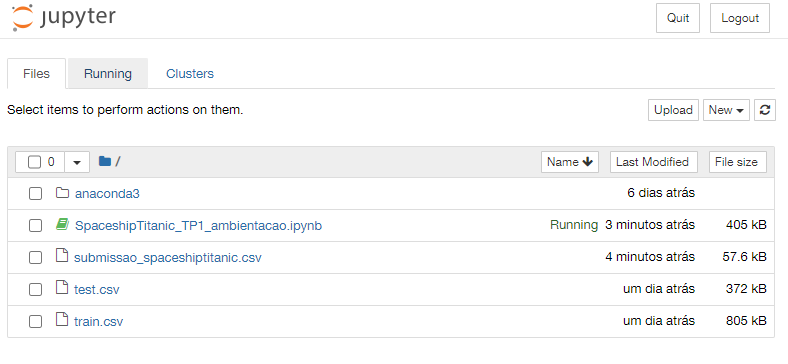

## Submissão no Kaggle

Meu usuário no Kaggle: https://www.kaggle.com/mtsftsmts

Submissão do arquivo .csv na plataforma Kaggle:

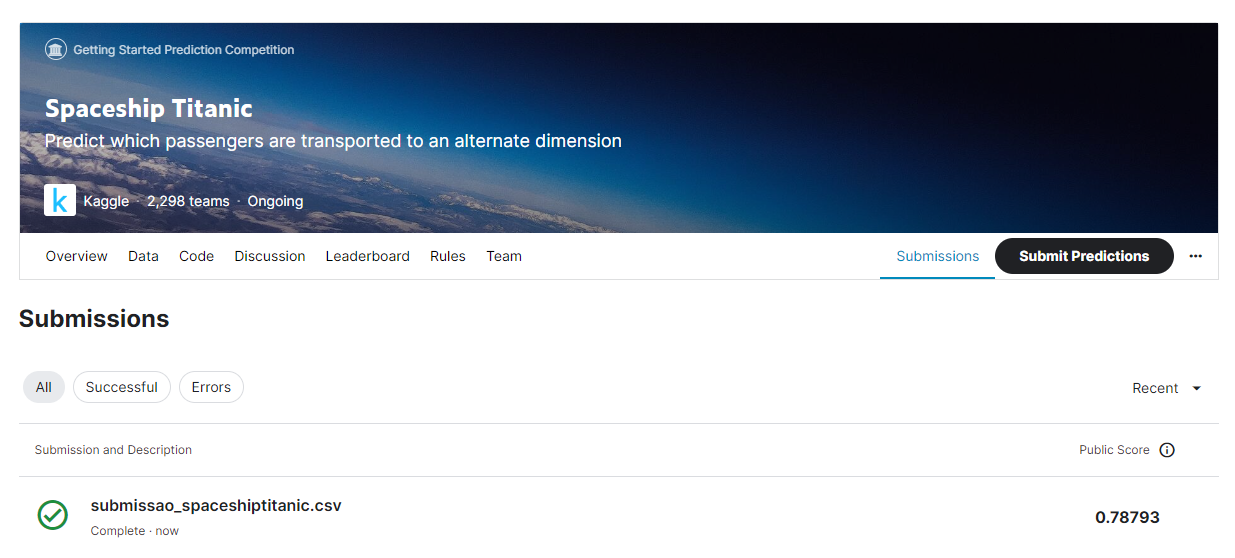